In [569]:
import pandas as pd
import numpy as np

In [570]:
df = pd.read_csv('Data/Housing.csv')

In [571]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [572]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [574]:
df.shape

(545, 13)

In [575]:
# check duplicates
df.duplicated().sum()

0

In [576]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [577]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [578]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

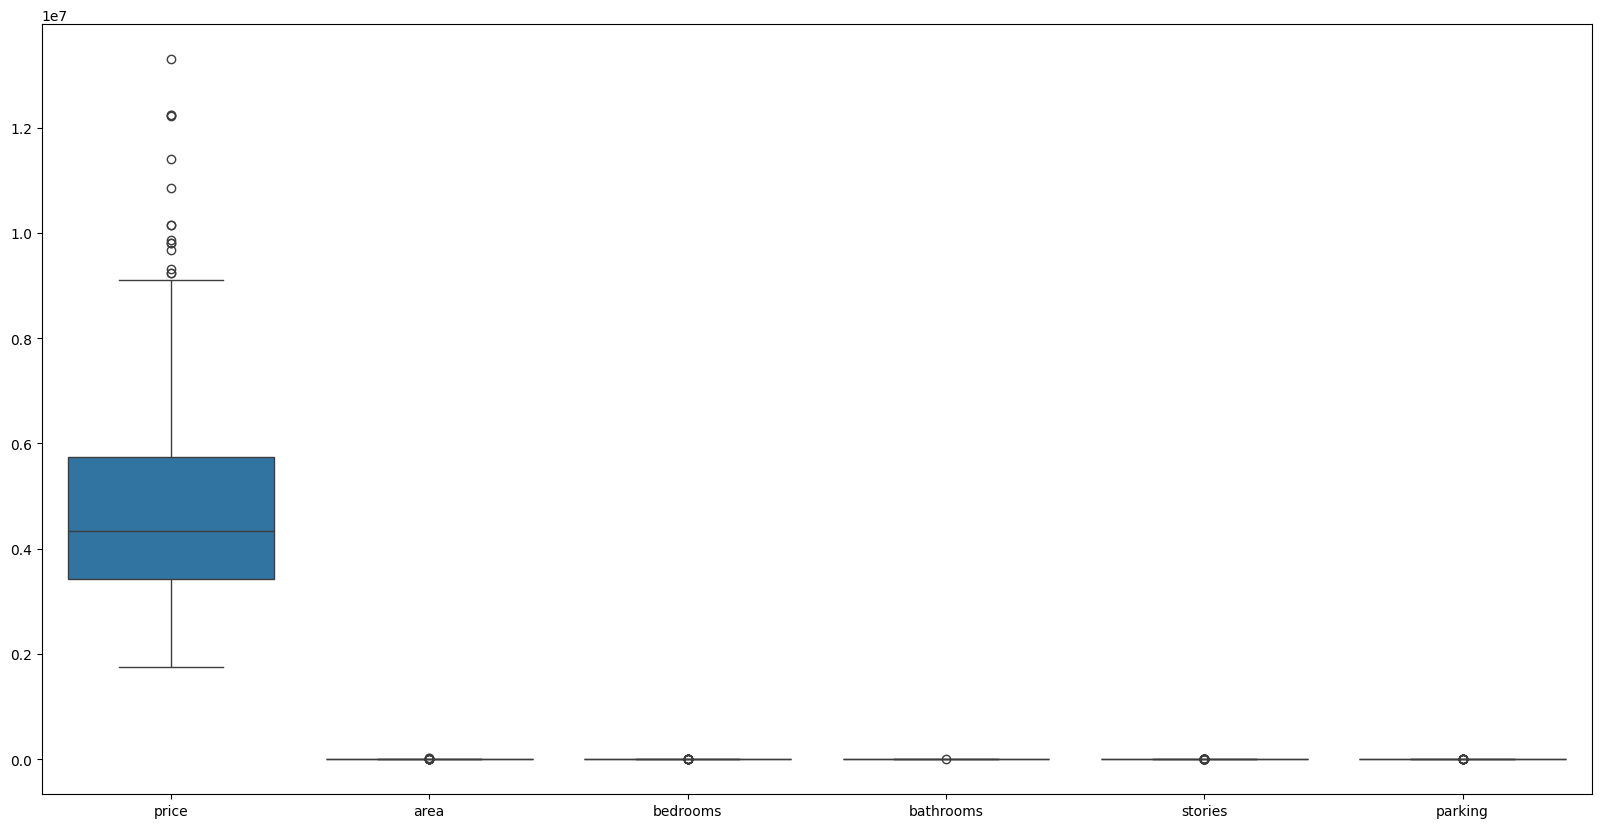

In [579]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

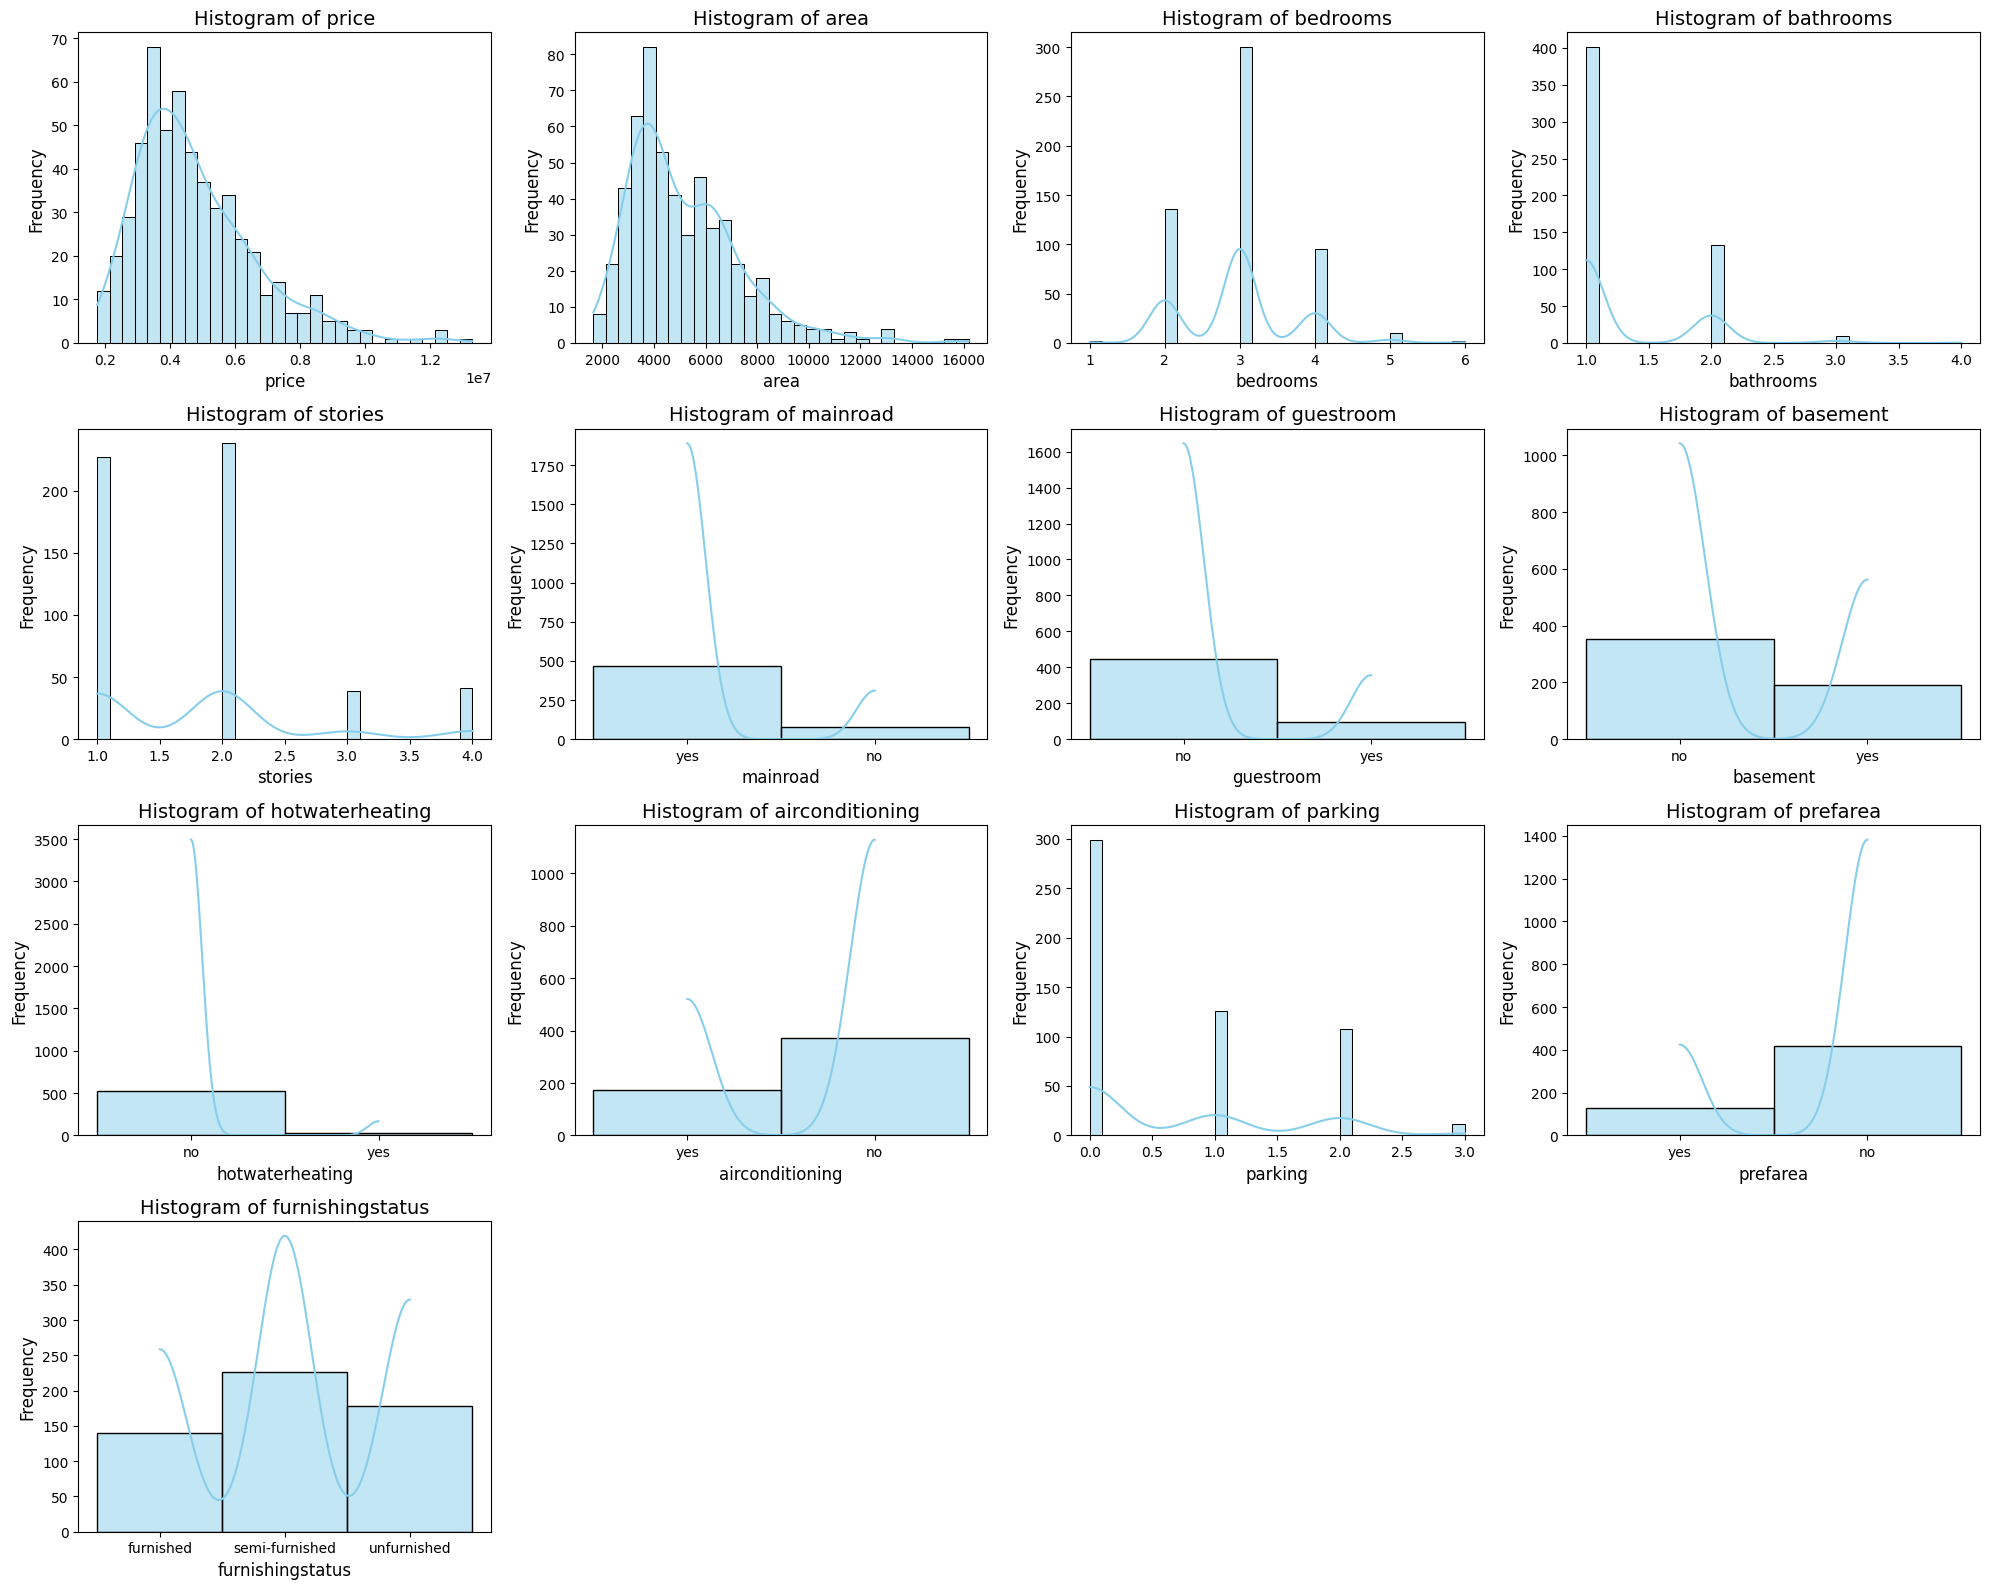

In [580]:
import math
num_features = len(df.columns)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(df.columns):
    sns.histplot(df[feature].dropna(), bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [581]:
len(df.columns)

13

<Axes: xlabel='area', ylabel='Count'>

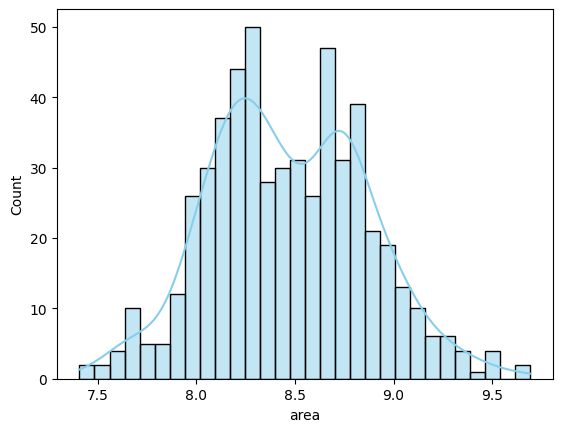

In [582]:
sns.histplot(np.log(df['area']), bins=30, kde=True, color='skyblue')


In [583]:
from scipy import stats
import numpy as np

zscores = np.abs(stats.zscore(df['price']))
outlier_indices = np.where(zscores > 2.1)[0]
df = df.drop(outlier_indices)

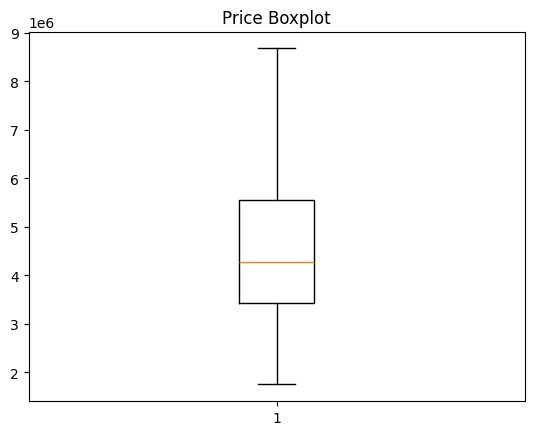

In [584]:
plt.boxplot(df['price'])
plt.title('Price Boxplot')
plt.show()

In [585]:
df['price'].describe()

count    5.240000e+02
mean     4.550947e+06
std      1.535542e+06
min      1.750000e+06
25%      3.428250e+06
50%      4.270000e+06
75%      5.565000e+06
max      8.680000e+06
Name: price, dtype: float64

In [586]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [587]:
cols = df.select_dtypes('object').drop(columns='furnishingstatus')
for feature in cols:
    df[feature] = df[feature].apply(lambda x: 1 if x=='yes' else 0)
    df[feature] = df[feature].astype(int)


In [588]:
# df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x=='furnished' else 0)
# df['furnishingstatus'] = df['furnishingstatus'].astype(int)

In [589]:
df = pd.get_dummies(df, columns=['furnishingstatus'], dtype=int)

In [590]:
df['area'] = np.log(df['area'])

In [591]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
21,8680000,8.875567,3,2,1,1,1,1,0,1,2,0,0,0,1
22,8645000,8.993427,3,1,1,1,1,1,0,1,1,0,1,0,0
23,8645000,8.425078,3,2,2,1,1,1,0,1,1,0,1,0,0
24,8575000,9.082507,3,2,2,1,0,0,0,1,2,0,1,0,0
25,8540000,8.785692,4,2,2,1,1,1,0,1,2,1,1,0,0


<Axes: >

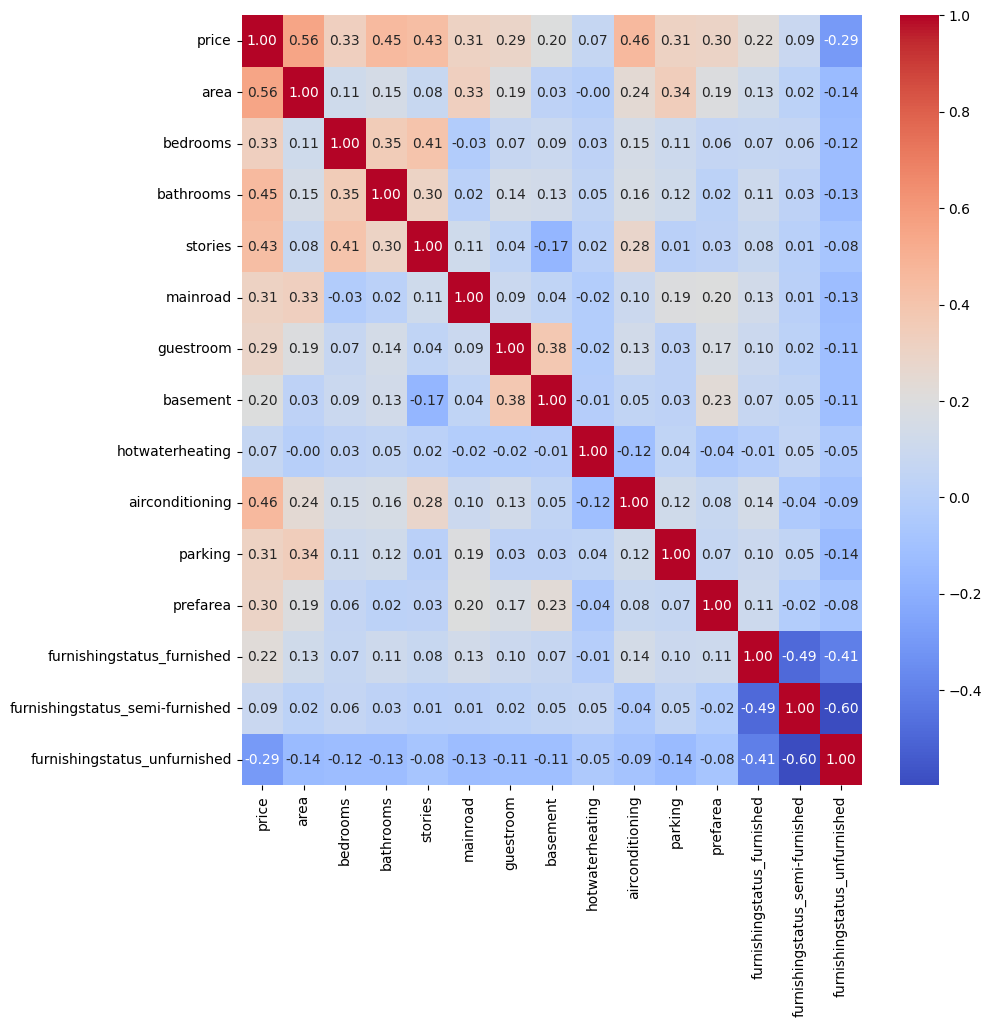

In [592]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm',
            fmt=".2f")

In [593]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
21,8680000,8.875567,3,2,1,1,1,1,0,1,2,0,0,0,1
22,8645000,8.993427,3,1,1,1,1,1,0,1,1,0,1,0,0
23,8645000,8.425078,3,2,2,1,1,1,0,1,1,0,1,0,0
24,8575000,9.082507,3,2,2,1,0,0,0,1,2,0,1,0,0
25,8540000,8.785692,4,2,2,1,1,1,0,1,2,1,1,0,0


In [594]:
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 52


In [595]:
model = LinearRegression()

In [596]:
model.fit(X_train, y_train)

LinearRegression()

In [597]:
y_pred = model.predict(X_test)

In [598]:
model.score(X_test, y_test)

0.7390113400093824

In [599]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [600]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 694773213043.6793
Mean Absolute Error: 643267.3600160595
Root Mean Squared Error: 833530.5711512201
R-squared: 0.7390113400093824


In [602]:
a=np.array([1,1,1,1,1]) 

a+1

array([2, 2, 2, 2, 2])